# 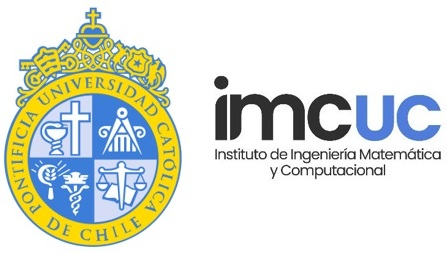  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 16: Exploración de Datos</center></h1>

Este notebook continua el trabajo anterior, con el objetivo que los estudiantes del curso aprendan diferentes comandos y técnicas en Python y, en particular, en Pandas, para la exploración de datos.

## 1. Datos a analizar

El archivo `titanic.csv` posee un conjunto de datos sobre los pasajeros del HMS Titanic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lectura de los datos

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
datasns = sns.load_dataset('titanic')
datasns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2. Visualización de distribuciones

Como primer paso veremos cómo visualizar la distribución de la edad de los pasajeros.

### 2.1 Histograma

Text(0, 0.5, 'edad')

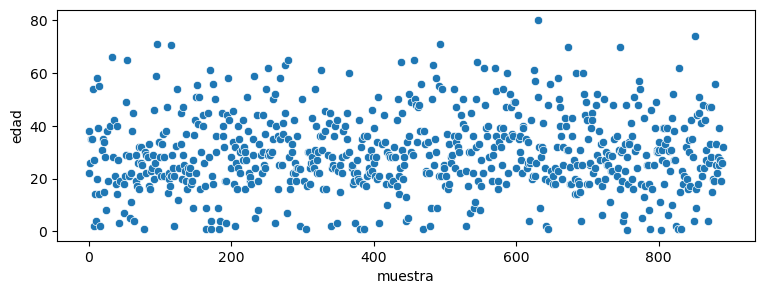

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9,3))
ax = sns.scatterplot(data.Age)
plt.xlabel('muestra')
plt.ylabel('edad')

Text(4.944444444444445, 0.5, 'cantidad')

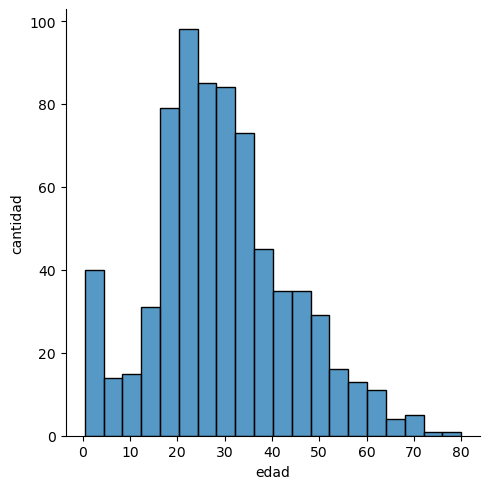

In [8]:
sns.displot(data.Age, kde=False, bins=20)
plt.xlabel('edad')
plt.ylabel('cantidad')

[(0.0, 90.0)]

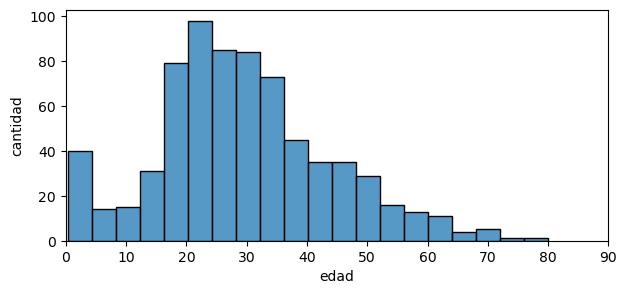

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7,3))
ax = sns.histplot(data=data, x='Age', bins=20)
ax.set_xlabel('edad')
ax.set_ylabel('cantidad')
ax.set(xlim=(0, 90))

[(0.0, 90.0)]

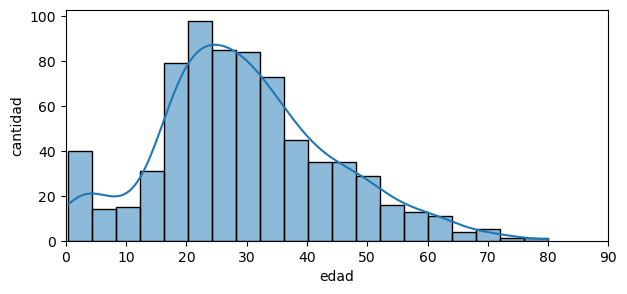

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7,3))
ax = sns.histplot(data=data, x='Age', bins=20, kde=True)
ax.set_xlabel('edad')
ax.set_ylabel('cantidad')
ax.set(xlim=(0, 90))

**Desafío**: tendrán +0.1 en la Tarea 3 los tres primeros estudiantes que envíen el gráfico anterior (histograma con estimación de densidad) pero que la línea de estimación de densidad sea de color rojo y de trazo segmentado.

Hay múltiples formas de hacer esto. Una de ellas es identificar la línea en `ax`, que en este caso es la línea 0, y editar su características usando `set` como verán a continuación.

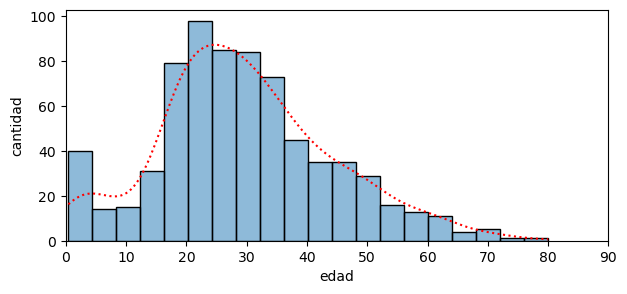

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7,3))
ax = sns.histplot(data=data, x='Age', bins=20, kde=True)
ax.set_xlabel('edad')
ax.set_ylabel('cantidad')
ax.set(xlim=(0, 90))
ax.lines[0].set_color('red')
ax.lines[0].set_linestyle(':')

Otra solución, enviada por Matías Valenzuela, es separar los gráficos y hacer la línea de estimación usando `kdeplot`. Ojo que es importante asegurar que ambos gráficos coincidan en sus ejes para que ajuste bien.

[(0.0, 90.0)]

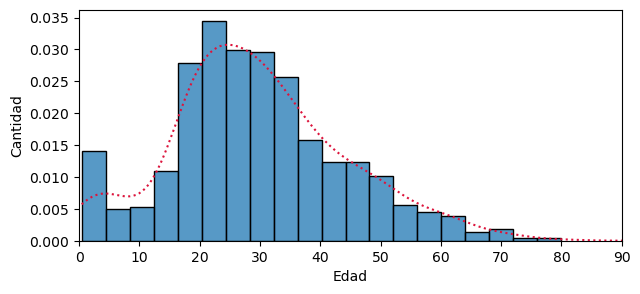

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax = sns.histplot(data=data, x="Age", bins=20, kde=False, stat="density")
sns.kdeplot(data=data, x="Age", color="crimson", ls=":", ax=ax)
ax.set_xlabel("Edad")
ax.set_ylabel("Cantidad")
ax.set(xlim=(0, 90))

# La fuente para ello fue:
# https://stackoverflow.com/questions/69524514/how-to-modify-the-kernel-density-estimate-line-in-a-sns-histplot